## Read data to to dataframe

In [7]:
import os
import pandas as pd

In [8]:
project_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

#TODO: argument for csv file name
csv_file_name = "music_metadata.csv"
csv_file_path = os.path.join(project_dir, "metadata", csv_file_name)

In [9]:
df = pd.read_csv(csv_file_path)
df.head()

,name,extension,path
0,50_Minutes-Colours,mp3,C:\users\user\studia\audio_clustering_autoenco...
1,50_Minutes-Nightwalk,mp3,C:\users\user\studia\audio_clustering_autoenco...
2,50_Minutes-The_Great_Wall,mp3,C:\users\user\studia\audio_clustering_autoenco...
3,Abigail_Lapell-Dress_Rehearsal,mp3,C:\users\user\studia\audio_clustering_autoenco...
4,Albino_Catfish-Ice_Cream,mp3,C:\users\user\studia\audio_clustering_autoenco...


## Retrieve features

In [20]:
import IPython.display as ipd
import librosa
import matplotlib
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

In [11]:
# matplotlib.use('Agg')
print(f"Interactive mode: {matplotlib.is_interactive()}")
print(f"matplotlib backend: {matplotlib.rcParams['backend']}")


color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

AUDIO_ID = 0

Interactive mode: False
matplotlib backend: module://matplotlib_inline.backend_inline


In [12]:
def get_audio(df, id):
    file_path = df.loc[id, 'path']
    return ipd.Audio(filename=file_path)


def display_audio(file):
    ipd.display(file)


def load_audio(df, id):
    file_path = df.loc[id, 'path']
    return librosa.load(file_path)

In [13]:
audio = get_audio(df, AUDIO_ID)
display_audio(audio)

In [14]:
#TODO: check is sample rate is ok
y, sr = load_audio(df, AUDIO_ID)
print(f"audio data (first 20): {y[:20]}")
print(f"audio data shape: {y.shape}")
print(f"sample rate: {sr}")

C:\Users\User\AppData\Local\Temp\ipykernel_16720\1686257282.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  return librosa.load(file_path)
C:\Users\User\miniconda3\envs\audio\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


audio data (first 20): [ 3.1664968e-08  7.4505806e-09 -3.7252903e-09  0.0000000e+00
 -9.3132257e-10 -1.1175871e-08 -4.6566129e-09 -1.9557774e-08
  9.3132257e-10 -4.6566129e-09 -2.6077032e-08 -3.7252903e-09
 -4.6566129e-09  1.3969839e-09 -1.0244548e-08 -2.6077032e-08
 -9.3132257e-10 -1.1175871e-08 -2.7939677e-08 -2.0489097e-08]
audio data shape: (221760,)
sample rate: 22050


In [21]:
def plot_raw_audio(y):
    fig, ax = plt.subplots(figsize=(12, 5))
    pd.Series(y).plot(
        ax=ax,
        lw=1,
        title="Raw Audio",
        color=color_pal[0]
    )
    return fig


def plot_spectogram(y):
    D = librosa.stft(y)
    dB_scaled_spectogram = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    fig, ax = plt.subplots(figsize=(12,5))
    img = librosa.display.specshow(
        dB_scaled_spectogram,
        x_axis='time',
        y_axis='log',
        ax=ax
    )
    ax.set_title('Spectogram', fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')

    return fig


def plot_mel_spectogram(y):
    S = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_mels=128 * 2,
    )
    dB_scaled_spectogram_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    fig, ax = plt.subplots(figsize=(12, 5))
    img = librosa.display.specshow(
        dB_scaled_spectogram_mel,
        x_axis='time',
        y_axis='log',
        ax=ax
    )
    ax.set_title('Mel Spectogram', fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')

    return fig


def plot_chroma(y, sr):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Get the chroma feature
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    
    # Plot the chroma feature
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chromagram')

    return fig


def plot_mfccs(y, sr):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Get the mel-frequency cepstral coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    
    # Plot the MFCCs
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')
    plt.ylabel('MFCC Coefficients')

    return fig, plot

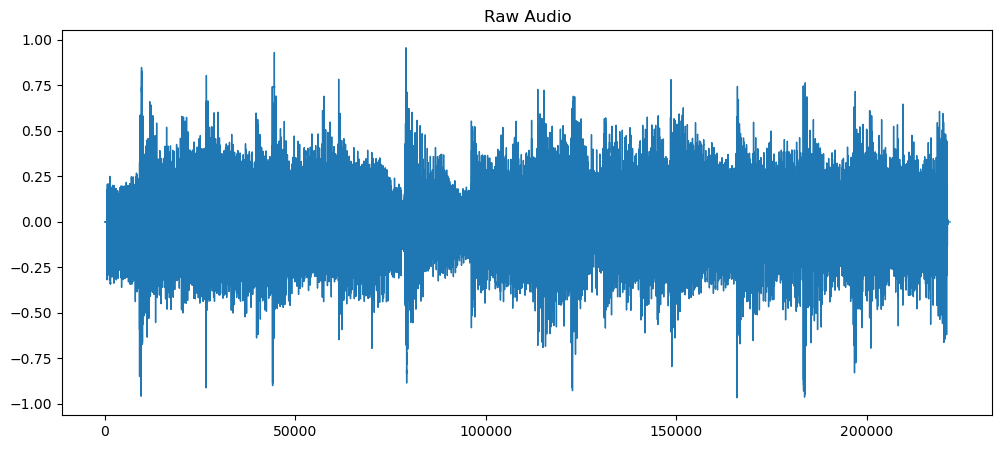

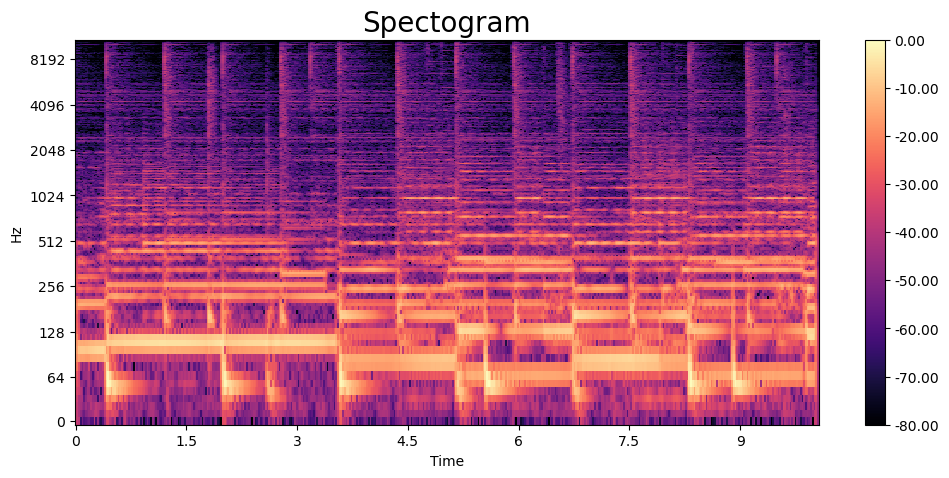

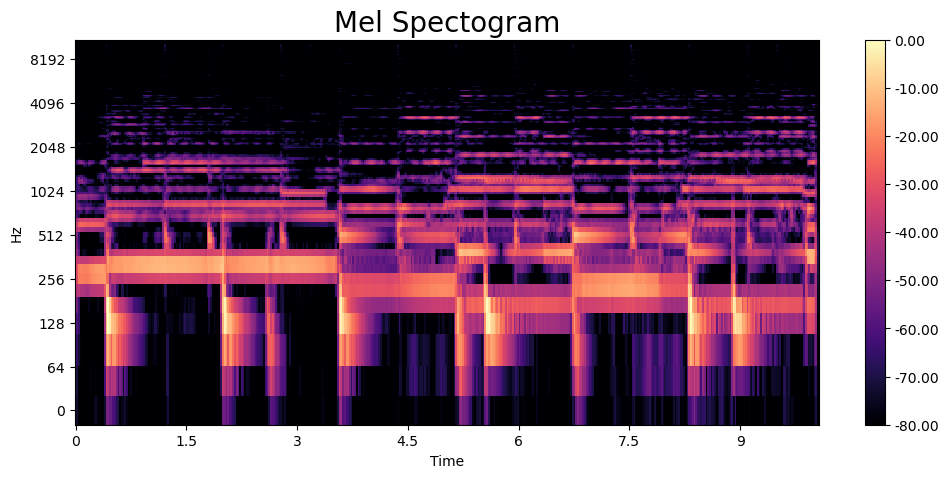

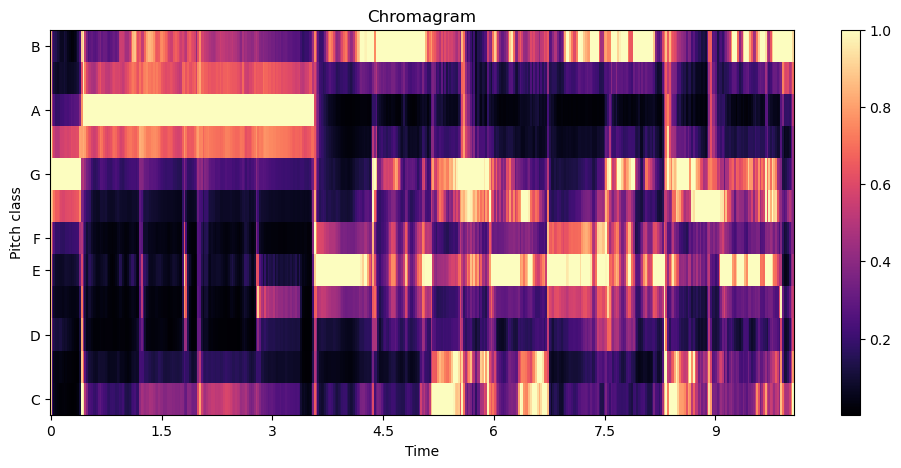

NameError: name 'plot' is not defined

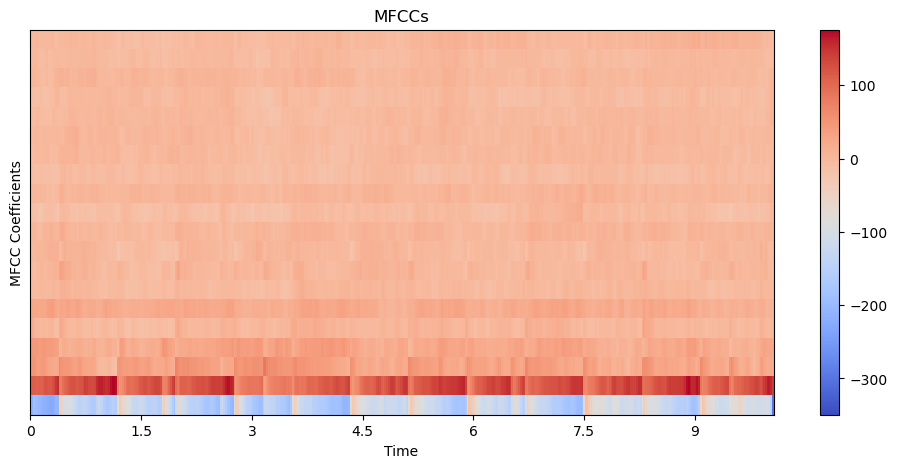

In [22]:
figure = plot_raw_audio(y)
plt.show()

figure = plot_spectogram(y)
plt.show()

figure = plot_mel_spectogram(y)
plt.show()

figure = plot_chroma(y, sr)
plt.show()

figure = plot_mfccs(y, sr)
plt.show()